# **Diagnosis of COVID-19 and its clinical spectrum**

Le jeu de données est téléchargeable en [appuyant ici](https://www.kaggle.com/datasets/einsteindata4u/covid19?resource=download)

Le but de notre étude est d'essayer de prédire le résultat d'un test au Covid-19 sur un individu donnée , en fonction des différentes caractéristiques de celui-ci.

Cet ensemble de données contient des données anonymes provenant de patients vus à l'Hospital Israelita Albert Einstein, à São Paulo, au Brésil, et dont les échantillons ont été prélevés pour effectuer la RT-PCR du SARS-Cov-2 et d'autres tests de laboratoire lors d'une visite à l'hôpital.

On peut tirer deux grands groupes parmi ces tests : 
   - les tests virologiques
   - les tests sanguins
    
On sait aussi si le patient est admis en soin hospitalier, en soin semi-intensif ou en soin intensif.


Nous allons dans cette partie effectuer un gros travail de nettoyage de données, ainsi que des statistiques descriptives afin de comprendre au mieux notre jeu de données et les liens entre les différentes variables.

# Data Analysis

In [1]:
# On importe les librairies usuelles 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
import warnings
warnings.filterwarnings('ignore')

On charge nos données et on affiche un petit aperçu afin de voir à quoi elles ressemblent.

In [2]:
data = pd.read_excel("dataset.xlsx")
data.head(n=6)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,75f16746216c4d1,9,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Notre target (la variable à prédire) est la variable `SARS-Cov-2 exam result` , qui détermine si l'individu est positif ou non à la COVID-19

In [6]:
data.shape

(5644, 111)

On a à notre disposition 5644 individus et 109 features (variables explicatives), en enlevant la target et la variable `Patient ID`

In [34]:
target = data["SARS-Cov-2 exam result"]
features = data.drop(["SARS-Cov-2 exam result", "Patient ID"], axis=1)
features.head(n=6)

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,13,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,9,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
features.dtypes.value_counts()

float64    70
object     35
int64       4
dtype: int64

Parmi nos features, 74 sont des variables quantitatives et 35 sont des variables qualitatives.

## Analyse des valeurs manquantes

In [46]:
features.isna()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5640,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5641,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5642,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


On observe à première vue qu'il y a beaucoup de données manquantes, on va calculer pour chaque colonne la proportion de données manquantes.

In [65]:
pd.set_option('display.max_row', 111)

(features.isna().sum()/features.shape[0]).sort_values()

Patient age quantile                                     0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydophila pneumoniae                                 0.760454
Parainfluenza 3                                          0.760454
Coronaviru

On peut même de façon graphique afficher l'emplacement des valeurs manquantes afin de se rendre mieux compte de l'organisation de notre jeu de données

<AxesSubplot:>

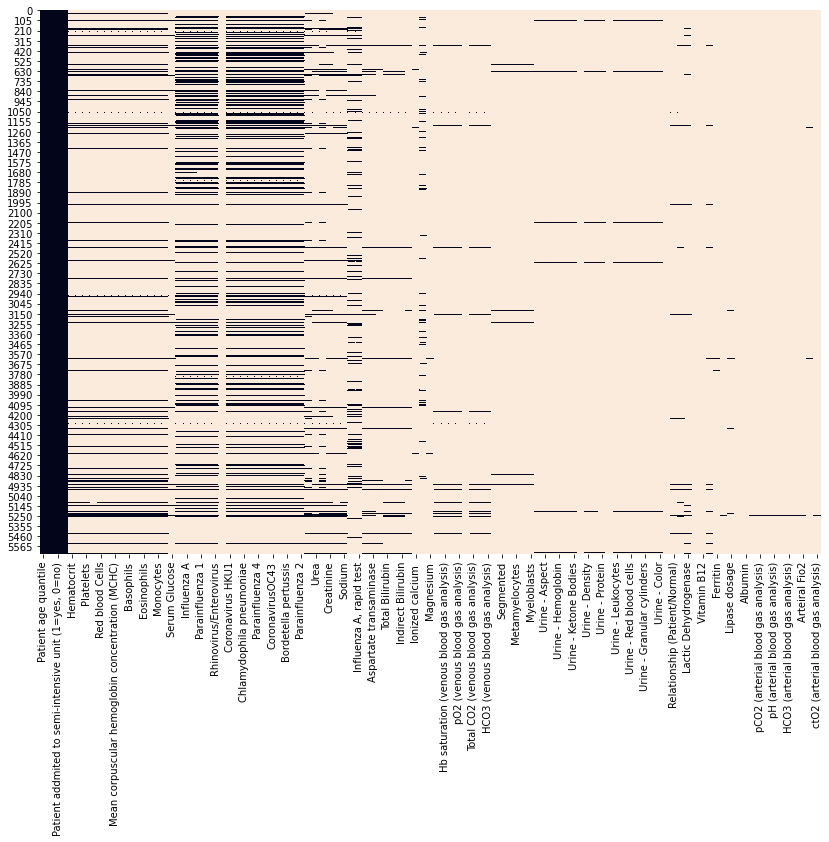

In [45]:
plt.figure(figsize=(14,10))
sns.heatmap(features.isna(), cbar=False)

On remarque de suite que nous allons devoir supprimer beaucoup de features qui ne sont pas exploitables par les manques de données, et nous remarquons aussi, avec les "lignes" de notre image ci-dessus, qu'il y a certainement des groupes de features liés. On le remarque aussi avec nos calculs des proportions par feature de données manquantes, car des features ont les mêmes proportions de données manquantes

Après une recherche, on remarque que le groupe de features avec 76% de données manquantes est composé de variables faisant rapport de tests virologiques et bactériens, et le groupe de features avec 89% de données manquantes est composé de variables liés à des taux sanguins.

## Visualisation

Nous allons éliminer toutes les features pour lesquelles la proportion de données manquantes est supérieure à 90%

In [70]:
features = features[features.columns[(features.isna().sum()/features.shape[0]) < 0.9]]

<AxesSubplot:>

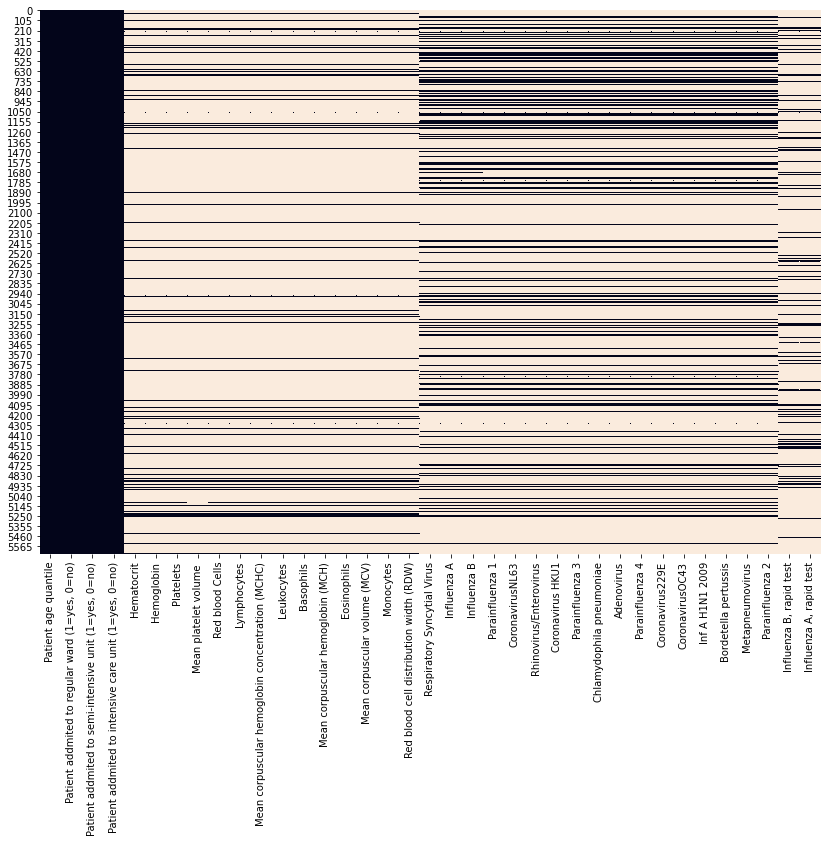

In [73]:
plt.figure(figsize=(14,10))
sns.heatmap(features.isna(),cbar=False)

In [77]:
target.value_counts()

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

On remarque que notre jeu de données n'est pas équilibrée, nous avons presque 10% d'individus testés positifs au SARS-Cov-2.
Cela nous fait déjà réfléchir sur le choix de la métrique à utiliser pour nos futurs modèles, en effet, une métrique comme l'accuracy ne serait pas une bonne idée, étant donné qu'on peut facilement avoir 90% d'accuracy juste en faisant la prédiction que le test sera négatif pour chaque individu.

### variables continues

<Figure size 432x288 with 0 Axes>

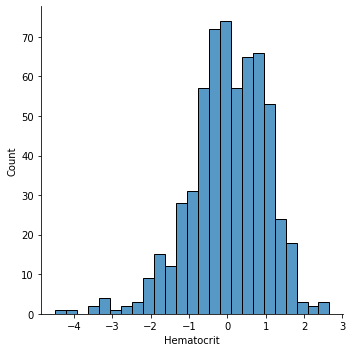

<Figure size 432x288 with 0 Axes>

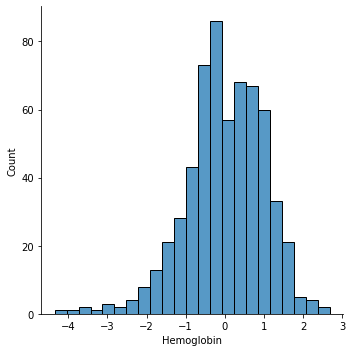

<Figure size 432x288 with 0 Axes>

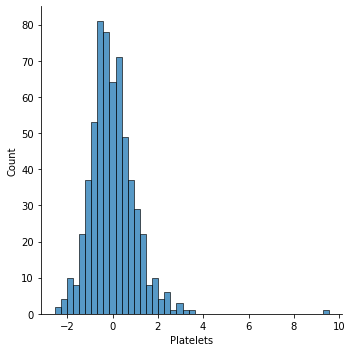

<Figure size 432x288 with 0 Axes>

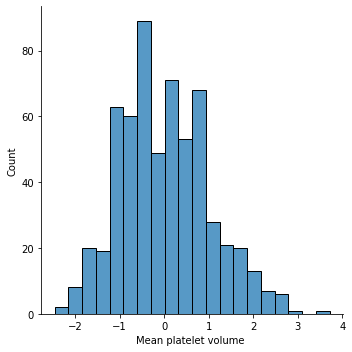

<Figure size 432x288 with 0 Axes>

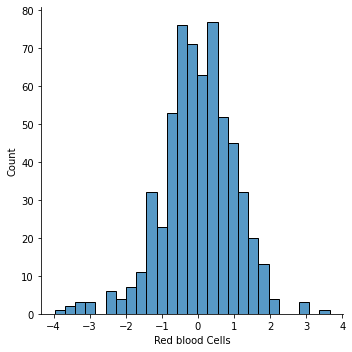

<Figure size 432x288 with 0 Axes>

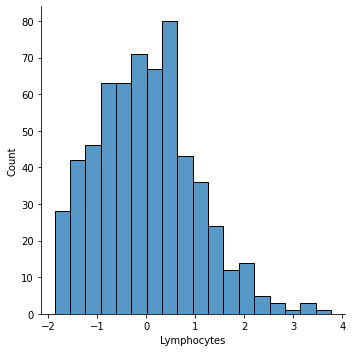

<Figure size 432x288 with 0 Axes>

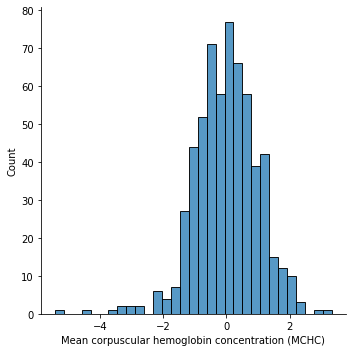

<Figure size 432x288 with 0 Axes>

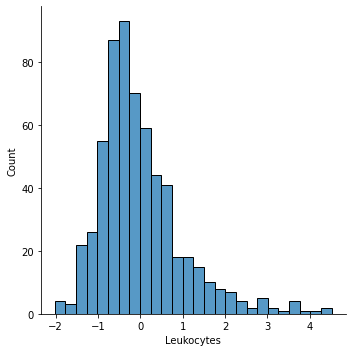

<Figure size 432x288 with 0 Axes>

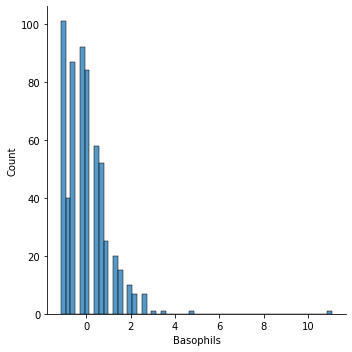

<Figure size 432x288 with 0 Axes>

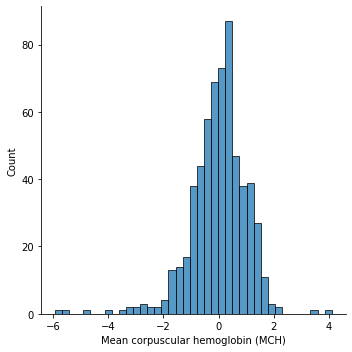

<Figure size 432x288 with 0 Axes>

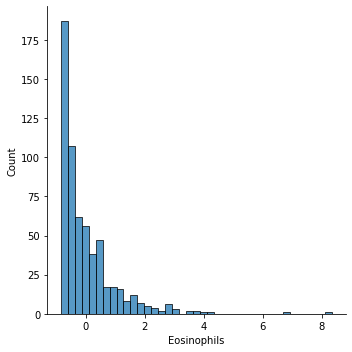

<Figure size 432x288 with 0 Axes>

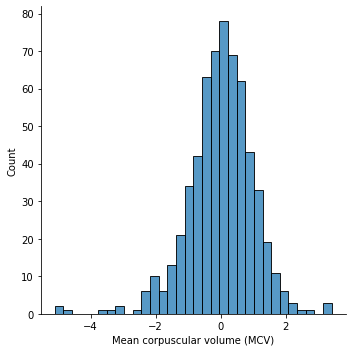

<Figure size 432x288 with 0 Axes>

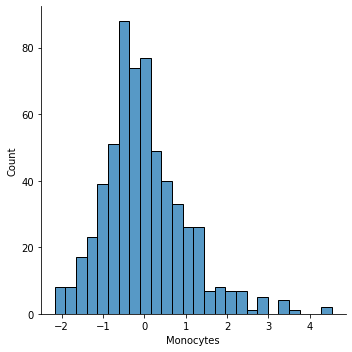

<Figure size 432x288 with 0 Axes>

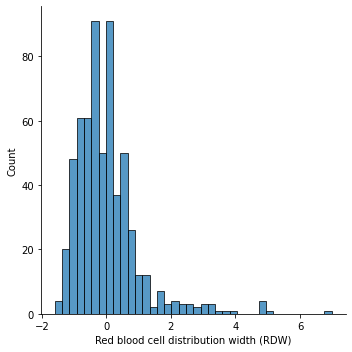

In [84]:
for col in features.select_dtypes('float'):
    plt.figure()
    sns.displot(features[col])
    plt.show()

On remarque que nos variables sont standardisées (centrés en 0 et d'écart-type égale à 1)
Une seule variable , `Eosinophils`, n'est pas symétrique

Une variable retient notre attention : `Patient age quantile`

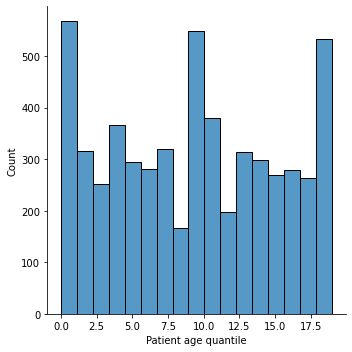

In [85]:
sns.displot(features['Patient age quantile'])

La description de cette variable n'est pas disponible sur le site Kaggle , nous pouvons donc seulement effectuer des conjectures...
Il semble que les âges soient rangées par tranche de 5 ans ( 0 correspond donc à 0-5 ans, 1 à 5-10 ans ect..), mais nous ne pouvons avoir aucune certitude sur la réelle définition de cette variable.

### Variables qualitatives

Regardons d'abord le nombre de catégories pour chaque variables qualitatives

In [96]:
for col in features.select_dtypes('object'):
    print(f"{col :<50} {features[col].unique()}")

Respiratory Syncytial Virus                        [nan 'not_detected' 'detected']
Influenza A                                        [nan 'not_detected' 'detected']
Influenza B                                        [nan 'not_detected' 'detected']
Parainfluenza 1                                    [nan 'not_detected' 'detected']
CoronavirusNL63                                    [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus                             [nan 'detected' 'not_detected']
Coronavirus HKU1                                   [nan 'not_detected' 'detected']
Parainfluenza 3                                    [nan 'not_detected' 'detected']
Chlamydophila pneumoniae                           [nan 'not_detected' 'detected']
Adenovirus                                         [nan 'not_detected' 'detected']
Parainfluenza 4                                    [nan 'not_detected' 'detected']
Coronavirus229E                                    [nan 'not_detected' 'detected']
Coro

Toutes ces variables sont binaires, cela était prévisible vu qu'ils s'agient de tests, une particularité concernant la variable `Parainfluenza 2`, tous les patients sont détéctés négatif pour ce virus là

Pour connaitre les taux de d'individus positives et d'individus négatives dans chaque variable, on va afficher les graphiques suivants :

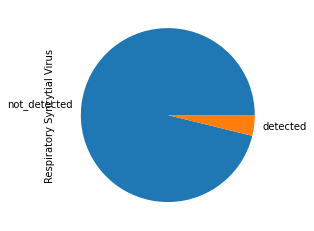

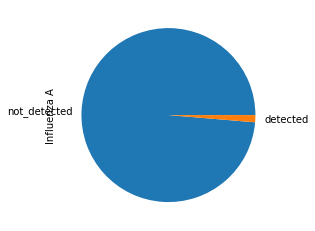

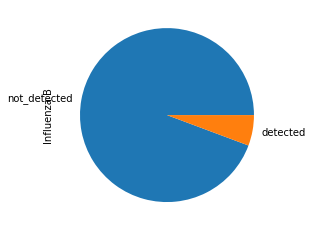

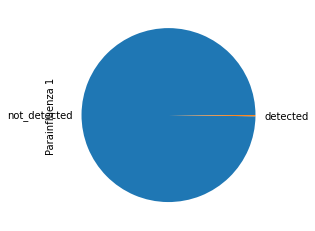

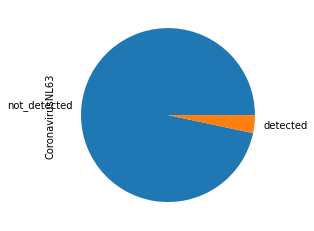

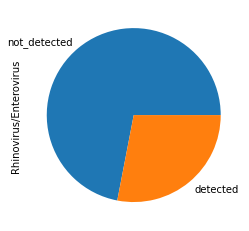

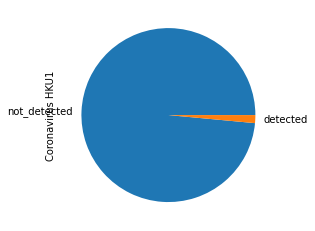

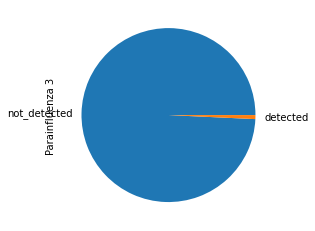

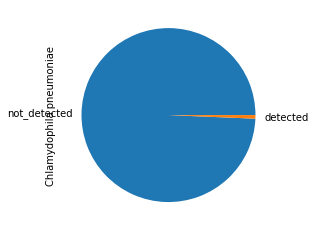

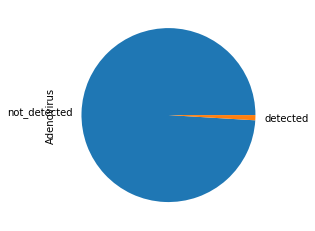

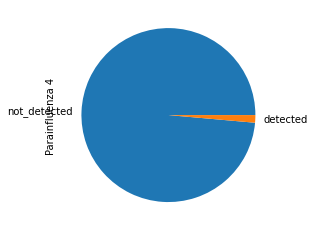

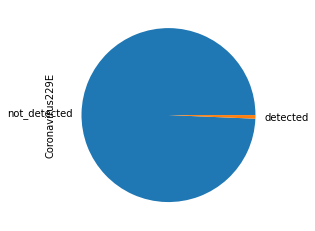

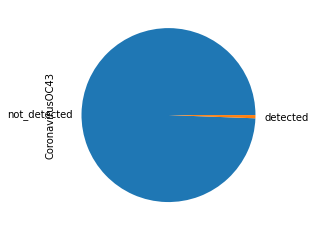

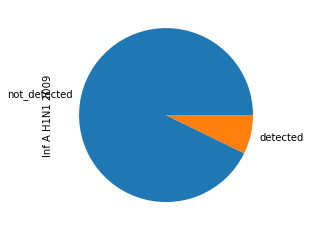

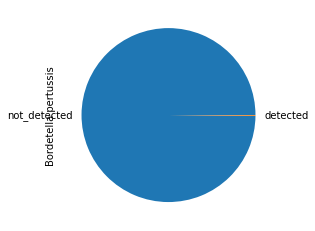

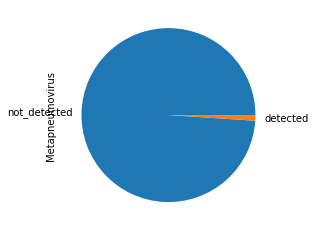

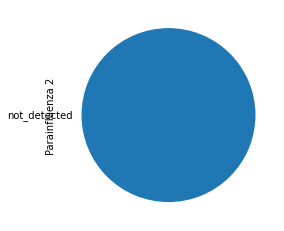

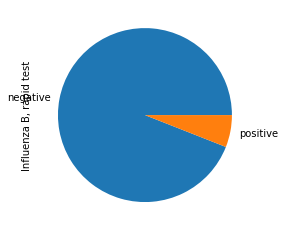

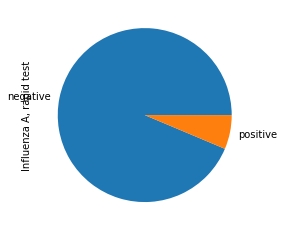

In [138]:
for col in features.select_dtypes('object'):
    plt.figure()
    features[col].value_counts().plot.pie()

Apart la variable `rhinovirus/enterovirus`, toutes les variables sont très mal équilibrés, avec une minorité d'individus testés positif.

## Relations target / variables

On va séparer les individus en deux groupes : 
   - ceux testés positives au sars-cov 2
   - ceux testés négatives au sars-covd 2

In [110]:
positive_data = data[data['SARS-Cov-2 exam result'] == "positive"]
negative_data = data[data['SARS-Cov-2 exam result'] == "negative"]

On va aussi séparer les features en deux groupes :
   - ceux des variables liés aux taux sanguins
   - ceux des variables liés aux tests virologiques.

In [130]:
missing_rate = data.isna().sum()/data.shape[0]
blood_features = data.columns[(missing_rate < 0.9) & (missing_rate > 0.86)]
viral_features = data.columns[(missing_rate < 0.8) & (missing_rate > 0.7)]

### Target / Blood

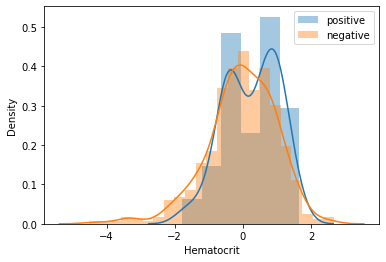

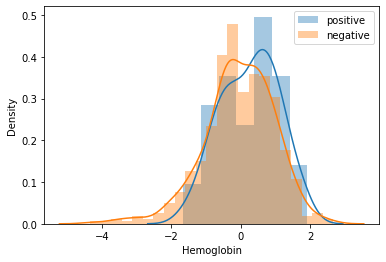

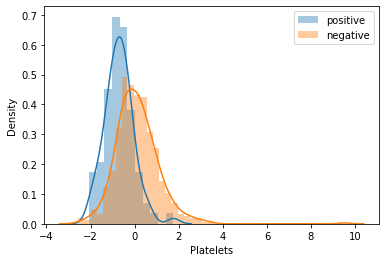

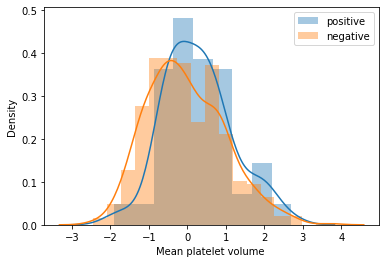

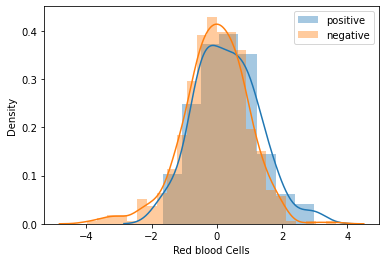

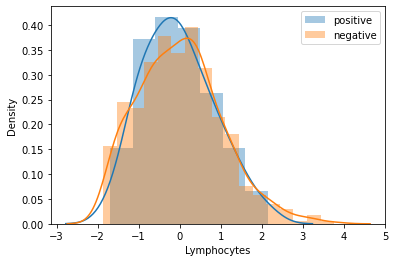

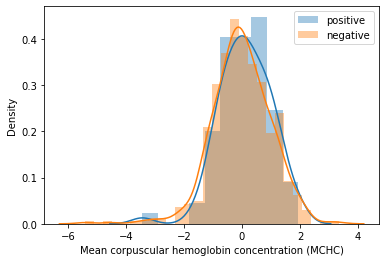

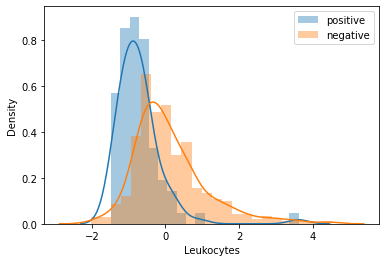

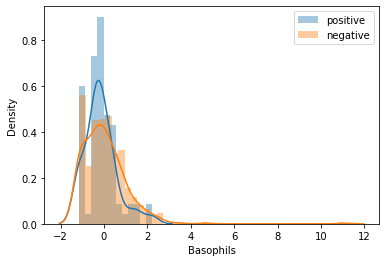

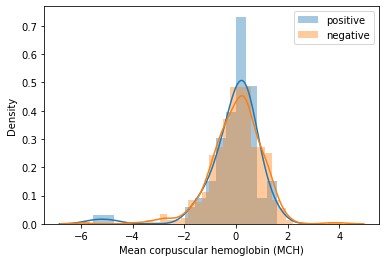

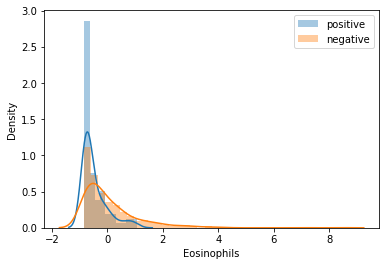

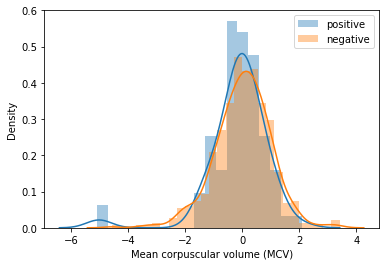

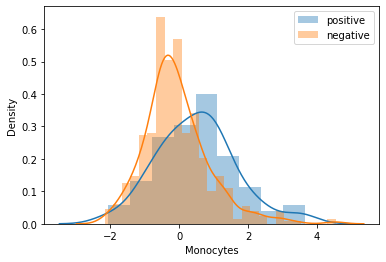

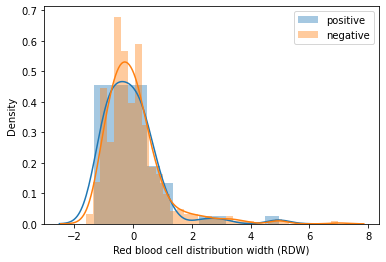

In [131]:
for col in blood_features:
    plt.figure()
    sns.distplot(positive_data[col] , label = "positive")
    sns.distplot(negative_data[col] , label = "negative")
    plt.legend()
    plt.show()

 On remarque une différence de distribution entre les individus positives et négatives au SARS-Cov-2 pour les taux de Monocytes, PLatelets et Leukocytes , cela peut être lié au Covid-19, il faudra tester ces hypothèses afin d'en avoir une certitude.

### Relation target/Age

<AxesSubplot:xlabel='Patient age quantile', ylabel='count'>

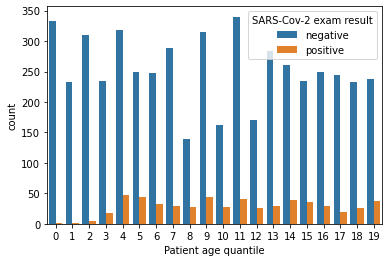

In [132]:
sns.countplot(x = 'Patient age quantile' , hue ='SARS-Cov-2 exam result', data=data)

On pourrait sans douter tirer de très bonnes hypothèses de ce graphique, cependant le manque de clarté concernant la définition de la variable `Patient age quantile` ne nous permet pas de tirer de conclusions précises.

### Relation target / viral

In [1]:
for col in viral_features:
    plt.figure()
    sns.heatmap(pd.crosstab(data["SARS-Cov-2 exam result"], data[col]), annot = True, fmd="d")

NameError: name 'viral_features' is not defined

On remarque que la présence d'un double virus est plutôt rare. Dans le cas du Rhinovirus/Enterovirus, lorsque celui est détécté, on constate une non présence du SARS-Cov-2, mais cela n'est qu'une hypothèse à tester , et peut être seulement le fruit de la région de l'hopital ou encore l'hopital lui-même, donc aucune conclusion hative ne doit être tirée.